In [1]:
library(tidyverse)
library(feather)
library(plotly)
library(caret)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [2]:
transactions <- feather::read_feather('..\\Data\\Datathon_2017\\Transactions_Frame')

Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"

In [3]:
ATC_Lookup <- feather::read_feather('..\\Data\\Datathon_2017\\ATC_Lookup')
ChronicIllness_LookUp <- feather::read_feather('..\\Data\\Datathon_2017\\ChronicIllness_LookUp')
Drug_LookUp <- feather::read_feather('..\\Data\\Datathon_2017\\Drug_LookUp')
patients <- feather::read_feather('..\\Data\\Datathon_2017\\patients')
stores <- feather::read_feather('..\\Data\\Datathon_2017\\stores')

Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"

In [4]:
patient_ids <- transactions %>% select(Patient_ID) %>% unique
sample_patient_id_ix <- sample(1:nrow(patient_ids))[1:(0.01*nrow(patient_ids))]
sample_patient_ids <- patient_ids[sample_patient_id_ix,]

In [5]:
sample_transactions <- transactions %>% filter(Patient_ID %in% sample_patient_ids$Patient_ID)

In [6]:
nrow(sample_transactions)

[1] 124037

In [21]:
sample_transactions %>% head(1)

Patient_ID,Store_ID,Prescriber_ID,Drug_ID,SourceSystem_Code,Prescription_Week,Dispense_Week,Drug_Code,NHS_Code,IsDeferredScript,Script_Qty,Dispensed_Qty,MaxDispense_Qty,PatientPrice_Amt,WholeSalePrice_Amt,GovernmentReclaim_Amt,RepeatsTotal_Qty,RepeatsLeft_Qty,StreamlinedApproval_Code
7,1427,25168,3423,F,2011-07-10,2011-08-07,FLOM2,4070F,0,30,2,NA,50,46.21,0,6,4,NA


In [20]:
Drug_LookUp %>% head(1)

MasterProductID,MasterProductCode,MasterProductFullName,BrandName,FormCode,StrengthCode,PackSizeNumber,GenericIngredientName,EthicalSubCategoryName,EthicalCategoryName,ManufacturerCode,ManufacturerName,ManufacturerGroupID,ManufacturerGroupCode,ChemistListPrice,ATCLevel5Code,ATCLevel4Code,ATCLevel3Code,ATCLevel2Code,ATCLevel1Code
7777,SCH4,SQUIBB HC OINT 1% 50G 1,SQUIBB HC,OINT,1% 50G,1,HYDROCORTISONE ACETATE,NON PBS Substitutable,ETHICAL NON PBS,BQ,BRISTOL-MYERS SQUIBB AUST,43,BMS,1.8609,A07EA,A07EA,A07E,A07,A


In [9]:
Drug_LookUp %>% filter(MasterProductID == 9417)

MasterProductID,MasterProductCode,MasterProductFullName,BrandName,FormCode,StrengthCode,PackSizeNumber,GenericIngredientName,EthicalSubCategoryName,EthicalCategoryName,ManufacturerCode,ManufacturerName,ManufacturerGroupID,ManufacturerGroupCode,ChemistListPrice,ATCLevel5Code,ATCLevel4Code,ATCLevel3Code,ATCLevel2Code,ATCLevel1Code
9417,ZOLO2,ZOLOFT TAB 50MG (AS HCL) 30 30,ZOLOFT,TAB,50MG (AS HCL),30,SERTRALINE,PBS Substitutable,ETHICAL PBS,PF,PFIZER AUSTRALIA PTY LTD,192,PFIZER,7.27,N06AB06,N06AB,N06A,N06,N


In [19]:
ATC_Lookup %>% head(1)

ATCLevel1Code,ATCLevel1Name,ATCLevel2Code,ATCLevel2Name,ATCLevel3Code,ATCLevel3Name,ATCLevel4Code,ATCLevel4Name,ATCLevel5Code,ATCLevel5Name
A,ALIMENTARY TRACT AND METABOLISM,A01,STOMATOLOGICAL PREPARATIONS,A01A,STOMATOLOGICAL PREPARATIONS,A01AB,ANTIINFECTIVES AND ANTISEPTICS FOR LOCAL ORAL TREATMENT,A01AB03,CHLORHEXIDINE


In [18]:
#ATC_Lookup %>% filter(ATCLevel5Code == 'N06AB06')

In [17]:
ChronicIllness_LookUp %>% head(1)

ChronicIllness,MasterProductID,MasterProductFullName
Diabetes,141,ACTOS TAB 30MG (AS HCL) 28


In [16]:
patients %>% head(1)

Patient_ID,gender,year_of_birth,postcode
1,F,1900,2516


In [15]:
stores %>% head(1)

Store_ID,StateCode,postcode,IsBannerGroup
1,VIC,3558,0


In [23]:
postcodes <- read.csv('..\\Data\\Datathon_2017\\Australian_Post_Codes_Lat_Lon.csv')

In [25]:
postcodes %>% head(1)

postcode,suburb,state,dc,type,lat,lon
200,AUSTRALIAN NATIONAL UNIVERSITY,ACT,AUSTRALIAN NATIONAL UNI LPO,Post Office Boxes,-35.27727,149.1171


postcode,lat,long
0,NA,NA
200,-35.27727,149.1171
221,-35.20137,149.0951
800,-12.80103,130.9558
801,-12.80103,130.9558
804,-12.43218,130.8433
810,-12.37697,130.8735
811,-12.37660,130.8505
812,-12.39013,130.8998
814,-12.38257,130.8539


In [57]:
sample_transactions %>% 
    left_join(patients, by='Patient_ID') %>% 
    left_join(postcodes %>% group_by(postcode) %>%
                summarise(lat = mean(lat),
                  long = mean(lon))
        , by='postcode') %>% 
    left_join(., ChronicIllness_LookUp, by = c('Drug_ID'='MasterProductID')) %>%
 filter( long > 140, long < 160, lat < -35 ) %>% head(10)

Patient_ID,Store_ID,Prescriber_ID,Drug_ID,SourceSystem_Code,Prescription_Week,Dispense_Week,Drug_Code,NHS_Code,IsDeferredScript,...,RepeatsTotal_Qty,RepeatsLeft_Qty,StreamlinedApproval_Code,gender,year_of_birth,postcode,lat,long,ChronicIllness,MasterProductFullName
156,1525,11637,765,F,2010-10-17,2011-01-02,ATAC3,8297Q,0,...,6,3,NA,F,1900,3450,-37.06203,144.2308,Hypertension,ATACAND TAB 16MG 30
156,1525,11637,2885,F,2010-10-17,2011-01-02,EFEX5,8302Y,0,...,6,3,NA,F,1900,3450,-37.06203,144.2308,Depression,EFEXOR XR SR-CAP 150MG 28
156,1525,11637,765,F,2010-10-17,2011-01-30,ATAC3,8297Q,0,...,6,2,NA,F,1900,3450,-37.06203,144.2308,Hypertension,ATACAND TAB 16MG 30
156,1525,11637,2885,F,2010-10-17,2011-01-30,EFEX5,8302Y,0,...,6,2,NA,F,1900,3450,-37.06203,144.2308,Depression,EFEXOR XR SR-CAP 150MG 28
156,1525,11637,2885,F,2011-05-01,2011-05-29,EFEX5,8302Y,0,...,6,4,NA,F,1900,3450,-37.06203,144.2308,Depression,EFEXOR XR SR-CAP 150MG 28
156,1525,11637,765,F,2011-05-01,2011-06-26,ATAC3,8297Q,0,...,6,4,NA,F,1900,3450,-37.06203,144.2308,Hypertension,ATACAND TAB 16MG 30
156,1525,11637,2885,F,2011-05-01,2011-06-26,EFEX5,8302Y,0,...,6,3,NA,F,1900,3450,-37.06203,144.2308,Depression,EFEXOR XR SR-CAP 150MG 28
156,1525,11637,765,F,2011-05-01,2011-07-31,ATAC3,8297Q,0,...,6,3,NA,F,1900,3450,-37.06203,144.2308,Hypertension,ATACAND TAB 16MG 30
156,1525,11637,2885,F,2011-05-01,2011-07-31,EFEX5,8302Y,0,...,6,2,NA,F,1900,3450,-37.06203,144.2308,Depression,EFEXOR XR SR-CAP 150MG 28
156,1525,11637,765,F,2011-05-01,2011-09-04,ATAC3,8297Q,0,...,6,2,NA,F,1900,3450,-37.06203,144.2308,Hypertension,ATACAND TAB 16MG 30


In [56]:
sample_transactions %>% select(Drug_ID, Patient_ID) %>%
    left_join(., Drug_LookUp, by = c('Drug_ID'='MasterProductID')) %>%
    left_join(., ChronicIllness_LookUp) %>% head(60)

Joining, by = "MasterProductFullName"


Drug_ID,Patient_ID,MasterProductCode,MasterProductFullName,BrandName,FormCode,StrengthCode,PackSizeNumber,GenericIngredientName,EthicalSubCategoryName,...,ManufacturerGroupID,ManufacturerGroupCode,ChemistListPrice,ATCLevel5Code,ATCLevel4Code,ATCLevel3Code,ATCLevel2Code,ATCLevel1Code,ChronicIllness,MasterProductID
3423,7,FLOM2,FLOMAXTRA SR-TAB 400MCG 30,FLOMAXTRA,SR-TAB,400MCG,30,TAMSULOSIN,PBS Substitutable,...,298,ASTELLAS PHARMA AUSTRALIA,51.76,G04CA02,G04CA,G04C,G04,G,Urology,3423
3423,7,FLOM2,FLOMAXTRA SR-TAB 400MCG 30,FLOMAXTRA,SR-TAB,400MCG,30,TAMSULOSIN,PBS Substitutable,...,298,ASTELLAS PHARMA AUSTRALIA,51.76,G04CA02,G04CA,G04C,G04,G,Urology,3423
2440,7,DIAF6,DIAFORMIN XR ER-TAB 500MG 120,DIAFORMIN XR,ER-TAB,500MG,120,METFORMIN HCL,PBS Generic,...,14,ALPHAPHARM,4.31,A10BA02,A10BA,A10B,A10,A,Diabetes,2440
12090,7,METF51,METFORMIN XR 500 (APO) ER-TAB 500MG 120 BTL,METFORMIN XR 500 (APO),ER-TAB,500MG,120,METFORMIN HCL,PBS Generic,...,20,APOTEX,4.31,A10BA02,A10BA,A10B,A10,A,Diabetes,12090
8965,135,VASO2,VASOCARDOL CD-CAP 180MG 30 30,VASOCARDOL,CD-CAP,180MG,30,DILTIAZEM,PBS Generic,...,217,SANOFI-AVENTIS,6.72,C08DB01,C08DB,C08D,C08,C,NA,NA
6470,135,PANA8,PANADOL OSTEO SR-TAB 665MG 96,PANADOL OSTEO,SR-TAB,665MG,96,PARACETAMOL,NON PBS Substitutable,...,105,GLAXOSMITHKLINE CONSUMER,4.44,N02BE01,N02BE,N02B,N02,N,NA,NA
8965,135,VASO2,VASOCARDOL CD-CAP 180MG 30 30,VASOCARDOL,CD-CAP,180MG,30,DILTIAZEM,PBS Generic,...,217,SANOFI-AVENTIS,6.72,C08DB01,C08DB,C08D,C08,C,NA,NA
8711,135,TRAM35,TRAMEDO SR-TAB 100MG 20,TRAMEDO,SR-TAB,100MG,20,TRAMADOL HYDROCHLORIDE,PBS Generic,...,14,ALPHAPHARM,2.72,N02AX02,N02AX,N02A,N02,N,NA,NA
8711,135,TRAM35,TRAMEDO SR-TAB 100MG 20,TRAMEDO,SR-TAB,100MG,20,TRAMADOL HYDROCHLORIDE,PBS Generic,...,14,ALPHAPHARM,2.72,N02AX02,N02AX,N02A,N02,N,NA,NA
862,135,AVAP2,AVAPRO HCT TAB 300MG/12.5MG 30,AVAPRO HCT,TAB,300MG/12.5MG,30,IRBESARTAN/HYDROCHLOROTHIAZIDE,PBS Substitutable,...,217,SANOFI-AVENTIS,6.22,C09DA04,C09DA,C09D,C09,C,Hypertension,862


Warning message:
"Removed 1065 rows containing non-finite values (stat_density2d)."

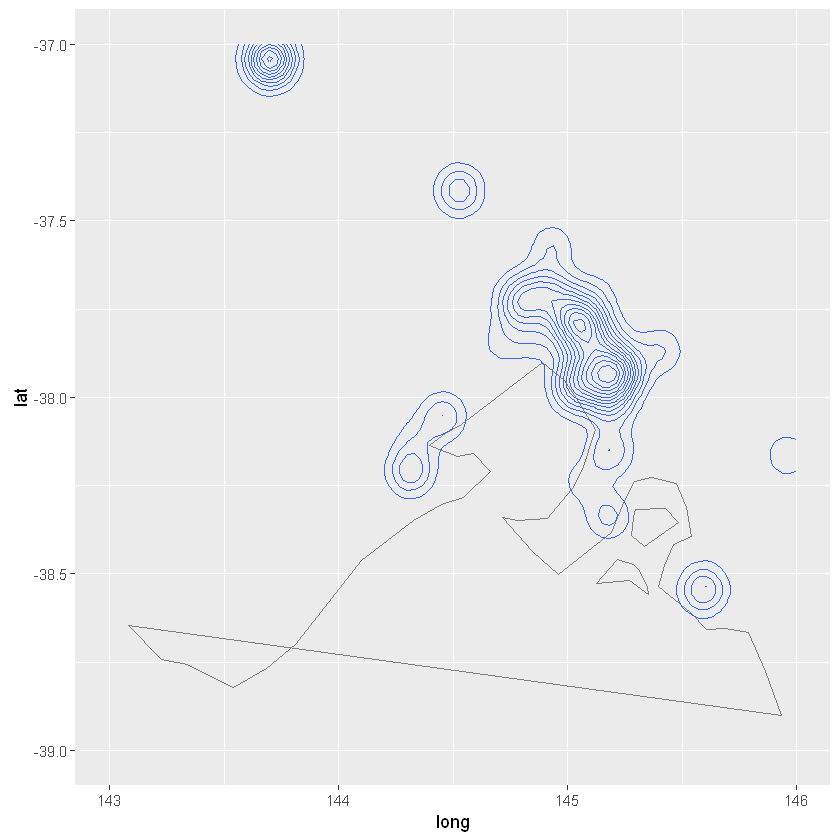

In [93]:
sample_transactions %>% 
    left_join(patients, by='Patient_ID') %>% 
    left_join(postcodes %>% group_by(postcode) %>%
                summarise(lat = mean(lat),
                  long = mean(lon))
        , by='postcode') %>% 
    left_join(., ChronicIllness_LookUp, by = c('Drug_ID'='MasterProductID')) %>%
 filter( long > 140, long < 160, lat < -35 ) %>% 
 filter( ChronicIllness == 'Diabetes') %>%
ggplot(aes(long,lat)) + mapWorld + geom_density_2d() + xlim(143, 146) + ylim(-39,-37)

In [65]:
library("ggmap")
library(maptools)
library(maps)


Attaching package: 'ggmap'

The following object is masked from 'package:plotly':

    wind

Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

Attaching package: 'maps'

The following object is masked from 'package:purrr':

    map



In [66]:
visited <- c("SFO", "Chennai", "London", "Melbourne", "Johannesbury, SA")
ll.visited <- geocode(visited)
visit.x <- ll.visited$lon
visit.y <- ll.visited$lat

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=SFO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chennai&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Melbourne&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Johannesbury,%20SA&sensor=false


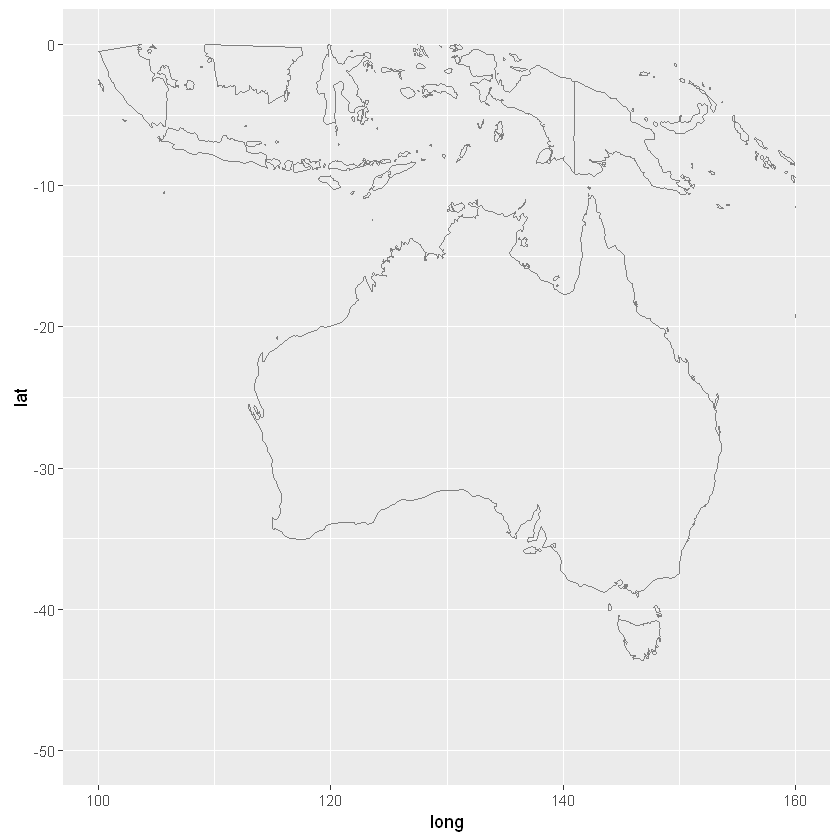

In [90]:
#Using GGPLOT, plot the Base World Map
mp <- NULL
mapWorld <- borders("world2", colour="gray50") # create a layer of borders
mp <- ggplot() + mapWorld + xlim(100, 160) + ylim(-50,0)
mp
#Now Layer the cities on top
#mp <- mp+ geom_point(aes(x=visit.x, y=visit.y) ,color="blue", size=3) 
#mp

In [72]:
? map 

In [73]:
help(package='maps')